### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from qiime2 import Metadata
from urllib import request
from qiime2 import Visualization
from scipy.stats import spearmanr

### Downloading data sets

In [ ]:
!wget \
  -O "sample-metadata.tsv" \
  "https://data.qiime2.org/2023.5/tutorials/atacama-soils/sample_metadata.tsv"

### Visualization of downloaded data sets

In [2]:
!qiime metadata tabulate \
  --m-input-file sample-metadata.tsv \
  --o-visualization metadata-summ-1.qzv

Saved Visualization to: metadata-summ-1.qzv


### Reading metadata as TSV file

In [3]:
metadata=pd.read_csv('sample-metadata.tsv', sep='\t')

In [4]:
metadata.head()

,sample-id,barcode-sequence,elevation,extract-concen,amplicon-concentration,extract-group-no,transect-name,site-name,depth,ph,...,ec,average-soil-relative-humidity,relative-humidity-soil-high,relative-humidity-soil-low,percent-relative-humidity-soil-100,average-soil-temperature,temperature-soil-high,temperature-soil-low,vegetation,percentcover
0,#q2:types,categorical,numeric,numeric,numeric,categorical,categorical,categorical,numeric,numeric,...,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,categorical,numeric
1,BAQ1370.1.2,GCCCAAGTTCAC,1370,0.019,0.950,B,Baquedano,BAQ1370,2,7.98,...,6.08,16.17,23.97,11.42,0,22.61,35.21,12.46,no,0
2,BAQ1370.3,GCGCCGAATCTT,1370,0.124,17.460,E,Baquedano,BAQ1370,2,NaN,...,6.08,16.17,23.97,11.42,0,22.61,35.21,12.46,no,0
3,BAQ1370.1.3,ATAAAGAGGAGG,1370,1.200,0.960,J,Baquedano,BAQ1370,3,8.13,...,NaN,16.17,23.97,11.42,0,22.61,35.21,12.46,no,0
4,BAQ1552.1.1,ATCCCAGCATGC,1552,0.722,18.830,J,Baquedano,BAQ1552,1,7.87,...,NaN,15.75,35.36,11.1,0,22.63,30.65,10.96,no,0


In [ ]:
cd qiime2-atacama-tutorial

### Downloading the forward sequences

In [5]:
!wget \
  -O "emp-paired-end-sequences/forward.fastq.gz" \
  "https://data.qiime2.org/2023.5/tutorials/atacama-soils/10p/forward.fastq.gz"

--2023-07-07 11:46:44--  https://data.qiime2.org/2023.5/tutorials/atacama-soils/10p/forward.fastq.gz
Resolving data.qiime2.org (data.qiime2.org)... 54.200.1.12
Connecting to data.qiime2.org (data.qiime2.org)|54.200.1.12|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://s3-us-west-2.amazonaws.com/qiime2-data/2023.5/tutorials/atacama-soils/10p/forward.fastq.gz [following]
--2023-07-07 11:46:45--  https://s3-us-west-2.amazonaws.com/qiime2-data/2023.5/tutorials/atacama-soils/10p/forward.fastq.gz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.155.120, 52.92.243.32, 52.218.132.0, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.155.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143193967 (137M) [binary/octet-stream]
Saving to: ‘emp-paired-end-sequences/forward.fastq.gz’

emp-paired-end-sequ 100%[===================>] 136.56M  3.92MB/s    in 41s     

2023-07-07 11:47

### Downloading the reverse sequences

In [ ]:
!wget \
  -O "emp-paired-end-sequences/reverse.fastq.gz" \
  "https://data.qiime2.org/2023.5/tutorials/atacama-soils/10p/reverse.fastq.gz"

In [6]:
mkdir emp-paired-end-sequences

mkdir: cannot create directory ‘emp-paired-end-sequences’: File exists


In [7]:
url = 'https://data.qiime2.org/2023.5/tutorials/atacama-soils/10p/barcodes.fastq.gz'
fn = 'emp-paired-end-sequences/barcodes.fastq.gz'
request.urlretrieve(url, fn)

('emp-paired-end-sequences/barcodes.fastq.gz',
 <http.client.HTTPMessage at 0x7f340193eee0>)

### Importing sequences in to the EMPPairedEndSequences artifact type

In [8]:
!qiime tools import \
   --type EMPPairedEndSequences \
   --input-path emp-paired-end-sequences \
   --output-path emp-paired-end-sequences.qza

Imported emp-paired-end-sequences as EMPPairedEndDirFmt to emp-paired-end-sequences.qza


### Demultiplexing

In [9]:
!qiime demux emp-paired \
  --m-barcodes-file sample-metadata.tsv \
  --m-barcodes-column barcode-sequence \
  --p-rev-comp-mapping-barcodes \
  --i-seqs emp-paired-end-sequences.qza \
  --o-per-sample-sequences demux-full.qza \
  --o-error-correction-details demux-details.qza

Saved SampleData[PairedEndSequencesWithQuality] to: demux-full.qza
Saved ErrorCorrectionDetails to: demux-details.qza


### Subsampling

In [10]:
!qiime demux subsample-paired \
  --i-sequences demux-full.qza \
  --p-fraction 0.3 \
  --o-subsampled-sequences demux-subsample.qza

!qiime demux summarize \
  --i-data demux-subsample.qza \
  --o-visualization demux-subsample.qzv

Saved SampleData[PairedEndSequencesWithQuality] to: demux-subsample.qza
Saved Visualization to: demux-subsample.qzv


In [11]:
Visualization.load('demux-subsample.qzv')

<visualization: Visualization uuid: 4f05265b-1566-4aa0-9e5c-45df1d223d29>

### Filltering out sequences shorter than 100

In [12]:
!qiime tools export \
  --input-path demux-subsample.qzv \
  --output-path ./demux-subsample/

!qiime demux filter-samples \
  --i-demux demux-subsample.qza \
  --m-metadata-file ./demux-subsample/per-sample-fastq-counts.tsv \
  --p-where 'CAST([forward sequence count] AS INT) > 100' \
  --o-filtered-demux demux.qza

Exported demux-subsample.qzv as Visualization to directory ./demux-subsample/
Saved SampleData[PairedEndSequencesWithQuality] to: demux.qza


In [13]:
!qiime demux summarize \
  --i-data demux.qza \
  --o-visualization demux.qzv

Saved Visualization to: demux.qzv


In [14]:
Visualization.load('demux.qzv')

<visualization: Visualization uuid: 1177be91-20c1-4598-89dd-1f89e03d8615>

### Denoising

In [15]:
!qiime dada2 denoise-paired \
  --i-demultiplexed-seqs demux.qza \
  --p-trim-left-f 13 \
  --p-trim-left-r 13 \
  --p-trunc-len-f 150 \
  --p-trunc-len-r 150 \
  --o-table table.qza \
  --o-representative-sequences rep-seqs.qza \
  --o-denoising-stats denoising-stats.qza

Saved FeatureTable[Frequency] to: table.qza
Saved FeatureData[Sequence] to: rep-seqs.qza
Saved SampleData[DADA2Stats] to: denoising-stats.qza


### Feature table summary

In [16]:
!qiime feature-table summarize \
  --i-table table.qza \
  --o-visualization table.qzv \
  --m-sample-metadata-file sample-metadata.tsv

!qiime feature-table tabulate-seqs \
  --i-data rep-seqs.qza \
  --o-visualization rep-seqs.qzv

!qiime metadata tabulate \
  --m-input-file denoising-stats.qza \
  --o-visualization denoising-stats.qzv

Saved Visualization to: table.qzv
Saved Visualization to: rep-seqs.qzv
Saved Visualization to: denoising-stats.qzv


In [17]:
Visualization.load('table.qzv')

<visualization: Visualization uuid: b150f189-5faa-4697-a655-4361ad72c8ef>

### --p-sampling-depth 

In [18]:
!qiime phylogeny align-to-tree-mafft-fasttree \
  --i-sequences rep-seqs.qza \
  --o-alignment aligned-rep-seqs.qza \
  --o-masked-alignment masked-aligned-rep-seqs.qza \
  --o-tree unrooted-tree.qza \
  --o-rooted-tree rooted-tree.qza

Saved FeatureData[AlignedSequence] to: aligned-rep-seqs.qza
Saved FeatureData[AlignedSequence] to: masked-aligned-rep-seqs.qza
Saved Phylogeny[Unrooted] to: unrooted-tree.qza
Saved Phylogeny[Rooted] to: rooted-tree.qza


### Core phylogenetic metrics

In [20]:
!qiime diversity core-metrics-phylogenetic \
  --i-phylogeny rooted-tree.qza \
  --i-table table.qza \
  --p-sampling-depth 500 \
  --m-metadata-file sample-metadata.tsv \
  --output-dir core-metrics-results

Saved FeatureTable[Frequency] to: core-metrics-results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: core-metrics-results/evenness_vector.qza
Saved DistanceMatrix to: core-metrics-results/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: core-metrics-results/bray_curtis_distance_matrix.qza
Saved PCoAResults to: core-metrics-results/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: core-metrics-results/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: core-metrics-results/jaccard_pcoa_results.qza
Saved PCoAResults to: core-metrics-results/bray_curtis_pcoa_re

In [21]:
Visualization.load('core-metrics-results/bray_curtis_emperor.qzv')

<visualization: Visualization uuid: a4c5dbc0-1ebc-4420-96e6-178d837591be>

Sampling depth of 440 will result in 49 samples analysed, excluded 5.
There will be 63,897 total frequences. 

### Rarefaction 

In [22]:
!qiime diversity alpha-rarefaction \
  --i-table table.qza \
  --i-phylogeny rooted-tree.qza \
  --p-max-depth 50 \
  --m-metadata-file sample-metadata.tsv \
  --o-visualization alpha-rarefaction_500.qzv

Saved Visualization to: alpha-rarefaction_500.qzv


### Taxonomic classification

In [ ]:
!wget \
  -O "gg-13-8-99-515-806-nb-classifier.qza" \
  "https://data.qiime2.org/2023.5/common/gg-13-8-99-515-806-nb-classifier.qza"

In [23]:
!qiime feature-classifier classify-sklearn \
  --i-classifier gg-13-8-99-515-806-nb-classifier.qza \
  --i-reads rep-seqs.qza \
  --o-classification taxonomy.qza

!qiime metadata tabulate \
  --m-input-file taxonomy.qza \
  --o-visualization taxonomy.qzv

Saved FeatureData[Taxonomy] to: taxonomy.qza
Saved Visualization to: taxonomy.qzv


In [24]:
Visualization.load('taxonomy.qzv')

<visualization: Visualization uuid: 22e99e25-360c-4e90-a793-28d714c5ac85>

In [25]:
!qiime taxa barplot \
  --i-table table.qza \
  --i-taxonomy taxonomy.qza \
  --m-metadata-file sample-metadata.tsv \
  --o-visualization taxa-bar-plots-1.qzv

Saved Visualization to: taxa-bar-plots-1.qzv


In [26]:
Visualization.load('taxa-bar-plots-1.qzv')

<visualization: Visualization uuid: 30de1055-8e7c-4fcf-8acd-3c39733645f6>

When samples are sorted based on their average soil relative humidity, the most abundant phyla are Actinobateria and Proteobacteria. However, Actinobacteria decrease as the reative soil humidity increases. 

# Beta diversity analysis

Using diversty beta-group-significance tool only categorical data can be provided. I have choosen 'vegetation' and 'transect-name' to check if there is any association in microbial composition of the samples. 


In [27]:
!qiime diversity beta-group-significance \
  --i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file sample-metadata.tsv \
  --m-metadata-column vegetation \
  --o-visualization core-metrics-results/unweighted-unifrac-vegetation-significance.qzv \
  --p-pairwise

!qiime diversity beta-group-significance \
  --i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file sample-metadata.tsv \
  --m-metadata-column transect-name \
  --o-visualization core-metrics-results/unweighted-unifrac-transect-name-significance.qzv \
  --p-pairwise

Saved Visualization to: core-metrics-results/unweighted-unifrac-vegetation-significance.qzv
Saved Visualization to: core-metrics-results/unweighted-unifrac-transect-name-significance.qzv


In [28]:
Visualization.load('core-metrics-results/unweighted-unifrac-vegetation-significance.qzv')

<visualization: Visualization uuid: fc1d89d2-2542-47d4-b056-872403d5808d>

In [29]:
Visualization.load('core-metrics-results/unweighted-unifrac-transect-name-significance.qzv')

<visualization: Visualization uuid: d6b7abbc-a3d1-442a-8081-24702d48ab22>

In [30]:
!qiime diversity beta-group-significance \
  --i-distance-matrix core-metrics-results/bray_curtis_distance_matrix.qza \
  --m-metadata-file sample-metadata.tsv \
  --m-metadata-column vegetation \
  --o-visualization core-metrics-results/bray_curtis-vegetation-significance.qzv \
  --p-pairwise

!qiime diversity beta-group-significance \
  --i-distance-matrix core-metrics-results/bray_curtis_distance_matrix.qza \
  --m-metadata-file sample-metadata.tsv \
  --m-metadata-column transect-name \
  --o-visualization core-metrics-results/bray_curtis-transect-name-significance.qzv \
  --p-pairwise

Saved Visualization to: core-metrics-results/bray_curtis-vegetation-significance.qzv
Saved Visualization to: core-metrics-results/bray_curtis-transect-name-significance.qzv


In [31]:
Visualization.load('core-metrics-results/bray_curtis-vegetation-significance.qzv')

<visualization: Visualization uuid: a8991896-7027-4fc6-a92f-0ebbe8818343>

In [32]:
Visualization.load('core-metrics-results/bray_curtis-transect-name-significance.qzv')

<visualization: Visualization uuid: 7c1cb724-6240-4745-81c3-898acd435927>

A beta diversity analysis using unweighted UniFrac-based principal-coordinate  was used to compare the composition of the Atacama Desert microbial communities isolated from two places: Yungay and Baquedano Transects. Permanova test shows that the microbial composition differnces are significant. The same result were obtained with Bray-Curtis principal-coordinate analysis. 
Significant differences in microbial composition of samples isolated form places with or without vegetation have been obsereved.

### Mantel test 


The Mantel test compares two distance matrices by computing the correlation between the distances in the lower (or upper) triangular portions of the symmetric distance matrices. In this case Spearman’s rank correlation coefficient


Three samples were identified in the metadata that required filtering out. These samples lacked values for the average soil relative humidity variable.

### Corelation between microbial comunity and elevation

In [33]:
!qiime metadata distance-matrix \
--m-metadata-file sample-metadata.tsv \
--m-metadata-column elevation \
--o-distance-matrix core-metrics-results/elevation-distance-matrix.qza

Saved DistanceMatrix to: core-metrics-results/elevation-distance-matrix.qza


In [34]:
!qiime diversity mantel \
    --i-dm1 core-metrics-results/elevation-distance-matrix.qza \
    --i-dm2 core-metrics-results/unweighted_unifrac_distance_matrix.qza \
    --p-intersect-ids \
    --p-label1 'Elevation' \
    --p-label2 'UniFrac distance matrix' \
    --o-visualization core-metrics-results/diversity-mantel-elevation-unifrac-uu.qzv

Saved Visualization to: core-metrics-results/diversity-mantel-elevation-unifrac-uu.qzv


In [35]:
Visualization.load('core-metrics-results/diversity-mantel-elevation-unifrac-uu.qzv')

<visualization: Visualization uuid: 34047186-1f85-4f37-94e7-45fd88b534ed>

In [36]:
!qiime diversity mantel \
    --i-dm1 core-metrics-results/elevation-distance-matrix.qza \
    --i-dm2 core-metrics-results/weighted_unifrac_distance_matrix.qza \
    --p-intersect-ids \
    --p-label1 'Elevation' \
    --p-label2 'UniFrac distance matrix' \
    --o-visualization core-metrics-results/diversity-mantel-elevation-unifrac-wu.qzv

Saved Visualization to: core-metrics-results/diversity-mantel-elevation-unifrac-wu.qzv


In [37]:
Visualization.load('core-metrics-results/diversity-mantel-elevation-unifrac-wu.qzv')

<visualization: Visualization uuid: 4e52c228-e95c-4880-bf00-573e7a3ea27b>

A study was conducted to compare UniFrac distance matrices with environmental variables, including elevation and humidity. The focus initially was on exploring the correlation between sample elevation and the qualitative and quantitative phylogenetic community composition.

Upon comparing elevation with the UniFrac distance matrices, it was observed that there was a correlation with the qualitative and quantitative phylogenetic community composition. The unweighted UniFrac Mantel's r-value was 0.525, and the weighted UniFrac Mantel's r-value was 0.463. However, it should be noted that the correlation is not particularly strong.

### Corelation between microbial comunity and average soil relative humidity

Three samples were identified in the metadata that required filtering out. These samples lacked values for the average soil relative humidity variable.

In [39]:
metadata.isnull()

,sample-id,barcode-sequence,elevation,extract-concen,amplicon-concentration,extract-group-no,transect-name,site-name,depth,ph,...,ec,average-soil-relative-humidity,relative-humidity-soil-high,relative-humidity-soil-low,percent-relative-humidity-soil-100,average-soil-temperature,temperature-soil-high,temperature-soil-low,vegetation,percentcover
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
72,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
metadata.shape

(76, 21)

In [41]:
metadata_ASRH = metadata[~metadata['sample-id'].isin(['BAQ4697.1', 'BAQ4697.2', 'BAQ4697.3'])]

Samples 'BAQ4697.1', 'BAQ4697.2', 'BAQ4697.3' were droped and df metadata_ASRH_1 has been created 

In [42]:
metadata_ASRH.shape

(73, 21)

In [43]:
metadata_ASRH.to_csv('metadata_ASRH_1.csv', index=False, sep='\t')

In [44]:
!qiime metadata distance-matrix \
--m-metadata-file metadata_ASRH_1.csv \
--m-metadata-column average-soil-relative-humidity \
--o-distance-matrix core-metrics-results/average-soil-relative-humidity-distance-matrix.qza

Saved DistanceMatrix to: core-metrics-results/average-soil-relative-humidity-distance-matrix.qza


In [45]:
!qiime diversity mantel \
    --i-dm1 core-metrics-results/average-soil-relative-humidity-distance-matrix.qza \
    --i-dm2 core-metrics-results/unweighted_unifrac_distance_matrix.qza \
    --p-intersect-ids \
    --p-label1 'Average-soil-relative-humidity' \
    --p-label2 'UniFrac distance matrix' \
    --o-visualization core-metrics-results/diversity-mantel-average-soil-relative-humidity-unifrac-uu.qzv

Saved Visualization to: core-metrics-results/diversity-mantel-average-soil-relative-humidity-unifrac-uu.qzv


In [46]:
Visualization.load('core-metrics-results/diversity-mantel-average-soil-relative-humidity-unifrac-uu.qzv')

<visualization: Visualization uuid: 2b1b0642-d25b-4663-a0fb-455800e75c8e>

In [47]:
!qiime diversity mantel \
    --i-dm1 core-metrics-results/average-soil-relative-humidity-distance-matrix.qza \
    --i-dm2 core-metrics-results/weighted_unifrac_distance_matrix.qza \
    --p-intersect-ids \
    --p-label1 'Average-soil-relative-humidity' \
    --p-label2 'UniFrac distance matrix' \
    --o-visualization core-metrics-results/diversity-mantel-average-soil-relative-humidity-unifrac-wu.qzv

Saved Visualization to: core-metrics-results/diversity-mantel-average-soil-relative-humidity-unifrac-wu.qzv


In [48]:
Visualization.load('core-metrics-results/diversity-mantel-average-soil-relative-humidity-unifrac-wu.qzv')

<visualization: Visualization uuid: 94222df3-097d-47f5-80d3-287fb3a70253>

Corelation between the avarage soil relative humidity and community composition was stronger than with elevation. Higher corelation was observed for the qualitative phylogenetic community composition, unweighted UniFrac Mantel’s r = 0.600, while weighted UniFrac Mantel’s r = 0.460.


### Corelation between microbial community and average soil temperature

In [49]:
!qiime metadata distance-matrix \
--m-metadata-file metadata_ASRH_1.csv \
--m-metadata-column average-soil-temperature \
--o-distance-matrix core-metrics-results/average-soil-temperature-distance-matrix.qza

Saved DistanceMatrix to: core-metrics-results/average-soil-temperature-distance-matrix.qza


In [50]:
!qiime diversity mantel \
    --i-dm1 core-metrics-results/average-soil-temperature-distance-matrix.qza \
    --i-dm2 core-metrics-results/unweighted_unifrac_distance_matrix.qza \
    --p-intersect-ids \
    --p-label1 'Average-soil-temperature' \
    --p-label2 'UniFrac distance matrix' \
    --o-visualization core-metrics-results/diversity-mantel-average-soil-temperature-unifrac-uu.qzv

Saved Visualization to: core-metrics-results/diversity-mantel-average-soil-temperature-unifrac-uu.qzv


In [51]:
Visualization.load('core-metrics-results/diversity-mantel-average-soil-temperature-unifrac-uu.qzv')

<visualization: Visualization uuid: 8729bdc0-0e91-4858-8e73-f5472686279a>

The correlation between avarage soil temperature and microbial community was weak, Mantel's r=0.384. 

# Alfa diversity

In [52]:
!qiime diversity alpha-group-significance \
  --i-alpha-diversity core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file sample-metadata.tsv \
  --o-visualization core-metrics-results/faith-pd-group-significance.qzv

!qiime diversity alpha-group-significance \
  --i-alpha-diversity core-metrics-results/evenness_vector.qza \
  --m-metadata-file sample-metadata.tsv \
  --o-visualization core-metrics-results/evenness-group-significance.qzv

!qiime diversity alpha-group-significance \
  --i-alpha-diversity core-metrics-results/shannon_vector.qza \
  --m-metadata-file sample-metadata.tsv \
  --o-visualization core-metrics-results/shannon-group-significance.qzv

Saved Visualization to: core-metrics-results/faith-pd-group-significance.qzv
Saved Visualization to: core-metrics-results/evenness-group-significance.qzv
Saved Visualization to: core-metrics-results/shannon-group-significance.qzv


In [53]:
Visualization.load('core-metrics-results/faith-pd-group-significance.qzv')

<visualization: Visualization uuid: fc3af9f0-0ad4-47ac-8bd9-98f04429027d>

In [54]:
Visualization.load('core-metrics-results/shannon-group-significance.qzv')

<visualization: Visualization uuid: fc9791d6-c333-4880-ade9-894a584ffd53>

### Merging the metadata with apha diversity metrix

In [55]:
!qiime metadata tabulate \
  --m-input-file metadata_ASRH_1.csv \
  --m-input-file core-metrics-results/faith_pd_vector.qza \
  --m-input-file core-metrics-results/shannon_vector.qza \
  --m-input-file core-metrics-results/evenness_vector.qza \
  --o-visualization tabulated-combined-metadata.qzv

Saved Visualization to: tabulated-combined-metadata.qzv


In [56]:
Visualization.load('tabulated-combined-metadata.qzv')

<visualization: Visualization uuid: 076fdc3c-8360-4534-8609-453787fb5ed0>

In [57]:
metadata_al=pd.read_csv('metadata_alpha.tsv', sep='\t')

In [58]:
metadata_al.head()

,id,barcode-sequence,elevation,extract-concen,amplicon-concentration,extract-group-no,transect-name,site-name,depth,ph,...,relative-humidity-soil-low,percent-relative-humidity-soil-100,average-soil-temperature,temperature-soil-high,temperature-soil-low,vegetation,percentcover,faith_pd,shannon_entropy,pielou_evenness
0,#q2:types,categorical,numeric,numeric,numeric,categorical,categorical,categorical,numeric,numeric,...,numeric,numeric,numeric,numeric,numeric,categorical,numeric,numeric,numeric,numeric
1,BAQ2420.1.1,ACACAGTCCTGA,2420,0.35,7.4,H,Baquedano,BAQ2420,1,9.33,...,41.135,46.77,22.45,28.297,13.294,no,0,5.8065988333929,4.21212170262176,0.896112269319252
2,BAQ2420.1.2,ATTATACGGCGC,2420,0.108,11.42,H,Baquedano,BAQ2420,2,9.36,...,41.135,46.77,22.45,28.297,13.294,no,0,6.19901836366772,4.55460592602971,0.910921185205943
3,BAQ2420.2,TAAACGCGACTC,2420,0.089,10.06,A,Baquedano,BAQ2420,2,9.36,...,41.135,46.77,22.45,28.297,13.294,no,0,5.68510137101081,4.88764999587309,0.93134861016133
4,BAQ2420.3,CCTCGGGTACTA,2420,0.083,15.92,C,Baquedano,BAQ2420,2,9.36,...,41.135,46.77,22.45,28.297,13.294,no,0,5.53301985340344,4.90612457180694,0.941773392996793


#### Shape of dataset

In [59]:
metadata_al.shape

(47, 24)

#### Dataset columns

In [60]:
metadata_al.columns

Index(['id', 'barcode-sequence', 'elevation', 'extract-concen',
       'amplicon-concentration', 'extract-group-no', 'transect-name',
       'site-name', 'depth', 'ph', 'toc', 'ec',
       'average-soil-relative-humidity', 'relative-humidity-soil-high',
       'relative-humidity-soil-low', 'percent-relative-humidity-soil-100',
       'average-soil-temperature', 'temperature-soil-high',
       'temperature-soil-low', 'vegetation', 'percentcover', 'faith_pd',
       'shannon_entropy', 'pielou_evenness'],
      dtype='object')

#### Droping 1st row

In [61]:
metadata_al1=metadata_al.drop(0, axis=0)
metadata_al1.head()

,id,barcode-sequence,elevation,extract-concen,amplicon-concentration,extract-group-no,transect-name,site-name,depth,ph,...,relative-humidity-soil-low,percent-relative-humidity-soil-100,average-soil-temperature,temperature-soil-high,temperature-soil-low,vegetation,percentcover,faith_pd,shannon_entropy,pielou_evenness
1,BAQ2420.1.1,ACACAGTCCTGA,2420,0.35,7.4,H,Baquedano,BAQ2420,1,9.33,...,41.135,46.77,22.45,28.297,13.294,no,0,5.8065988333929,4.21212170262176,0.896112269319252
2,BAQ2420.1.2,ATTATACGGCGC,2420,0.108,11.42,H,Baquedano,BAQ2420,2,9.36,...,41.135,46.77,22.45,28.297,13.294,no,0,6.19901836366772,4.55460592602971,0.910921185205943
3,BAQ2420.2,TAAACGCGACTC,2420,0.089,10.06,A,Baquedano,BAQ2420,2,9.36,...,41.135,46.77,22.45,28.297,13.294,no,0,5.68510137101081,4.88764999587309,0.93134861016133
4,BAQ2420.3,CCTCGGGTACTA,2420,0.083,15.92,C,Baquedano,BAQ2420,2,9.36,...,41.135,46.77,22.45,28.297,13.294,no,0,5.53301985340344,4.90612457180694,0.941773392996793
5,BAQ2420.1.3,ATTCAGATGGCA,2420,0.132,10,H,Baquedano,BAQ2420,3,8.9,...,41.135,46.77,22.45,28.297,13.294,no,0,5.71645820895716,4.45649199972679,0.868833321344219


#### Checking null counts

In [62]:
metadata_al1.isnull().sum()

id                                    0
barcode-sequence                      0
elevation                             0
extract-concen                        0
amplicon-concentration                0
extract-group-no                      0
transect-name                         0
site-name                             0
depth                                 0
ph                                    0
toc                                   9
ec                                    9
average-soil-relative-humidity        0
relative-humidity-soil-high           0
relative-humidity-soil-low            0
percent-relative-humidity-soil-100    0
average-soil-temperature              0
temperature-soil-high                 0
temperature-soil-low                  0
vegetation                            0
percentcover                          0
faith_pd                              0
shannon_entropy                       0
pielou_evenness                       0
dtype: int64

#### Changing names of the columns 

In [63]:
metadata_al2 = metadata_al1.rename(columns={'barcode-sequence' : 'barcode_sequence',
                                            'extract-concen' : 'extract_concen', 
                                            'amplicon_concentration' : 'amplicon_concentration', 
                                            'extract-group-no':'extract_group_no', 
                                            'site-name': 'site_name',
                                            'transect-name' : 'transect_name', 
                                            'average-soil-relative-humidity': 'average_soil_relative_humidity', 
                                            'average-soil-temperature' : 'average_soil_temperature',
                                            'relative-humidity-soil-high' : 'relative_humidity_soil_high',
                                            'relative-humidity-soil-low' : 'relative_humidity_soil_low',
                                            'percent-relative-humidity-soil-100' : 'percent_relative_humidity_soil_100',
                                            'temperature-soil-high' : 'temperature_soil_high',
                                            'temperature-soil-low' : 'temperature_soil_low'})

In [64]:
metadata_al2.columns

Index(['id', 'barcode_sequence', 'elevation', 'extract_concen',
       'amplicon-concentration', 'extract_group_no', 'transect_name',
       'site_name', 'depth', 'ph', 'toc', 'ec',
       'average_soil_relative_humidity', 'relative_humidity_soil_high',
       'relative_humidity_soil_low', 'percent_relative_humidity_soil_100',
       'average_soil_temperature', 'temperature_soil_high',
       'temperature_soil_low', 'vegetation', 'percentcover', 'faith_pd',
       'shannon_entropy', 'pielou_evenness'],
      dtype='object')

#### Changing the teh type of data from object to float

In [65]:
metadata_al2['average_soil_relative_humidity'].dtype

dtype('O')

In [66]:
metadata_al2[['elevation', 'extract_concen', 'amplicon-concentration', 'depth', 'ph', 'toc', 'ec',
       'average_soil_relative_humidity', 'relative_humidity_soil_high',
       'relative_humidity_soil_low', 'percent_relative_humidity_soil_100',
       'average_soil_temperature', 'temperature_soil_high',
       'temperature_soil_low', 'percentcover', 'faith_pd',
       'shannon_entropy', 'pielou_evenness']] = metadata_al2[['elevation', 'extract_concen',
       'amplicon-concentration', 'depth', 'ph', 'toc', 'ec',
       'average_soil_relative_humidity', 'relative_humidity_soil_high',
       'relative_humidity_soil_low', 'percent_relative_humidity_soil_100',
       'average_soil_temperature', 'temperature_soil_high',
       'temperature_soil_low', 'percentcover', 'faith_pd',
       'shannon_entropy', 'pielou_evenness']].astype(float).copy()

In [67]:
metadata_al2['average_soil_relative_humidity'].dtype

dtype('float64')

#### Calculating the correlation between Shannon Index (diversity) and Average Soil Relative Humidity

In [68]:
metadata_al2['shannon_entropy'].corr(metadata_al2['average_soil_relative_humidity'])

0.6483912054803316

#### Calculating the correlation between Faith's Phylogenetic Diverisity Index (richness) and Average Soil Relative Humidity

In [69]:
metadata_al2['faith_pd'].corr(metadata_al2['average_soil_relative_humidity'])

0.6770761908935745

In [70]:
%matplotlib inline

#### Drawing a plot

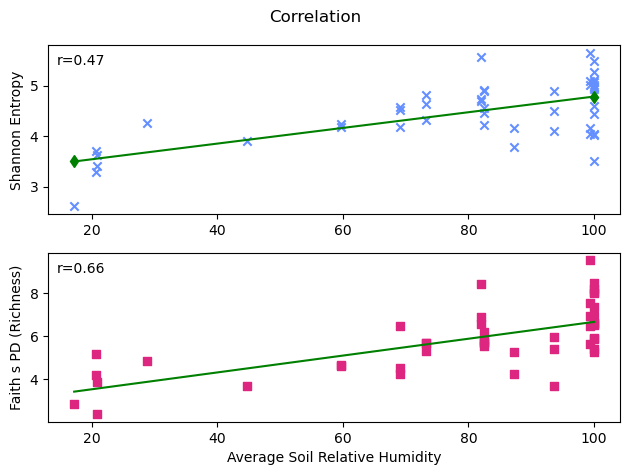

In [71]:
# Scatter plot 1
plt.subplot(2, 1, 1)
plt.scatter(metadata_al2.average_soil_relative_humidity, metadata_al2.shannon_entropy, color='#648FFF', marker='x')
plt.ylabel('Shannon Entropy')

# Calculation of the trend line
slope1, intercept1 = np.polyfit(metadata_al2.average_soil_relative_humidity, metadata_al2.shannon_entropy, 1)
x1 = np.array([min(metadata_al2.average_soil_relative_humidity), max(metadata_al2.average_soil_relative_humidity)])
y1 = slope1 * x1 + intercept1

# Trend line
plt.plot(x1, y1, color='green', marker='d')

plt.text(0.1, 0.95, f'r=0.47', ha='right', va='top', transform=plt.gca().transAxes)

# Scatter plot 2
plt.subplot(2, 1, 2)
plt.scatter(metadata_al2.average_soil_relative_humidity, metadata_al2.faith_pd, color='#DC267F', marker='s')
plt.xlabel('Average Soil Relative Humidity')
plt.ylabel('Faith s PD (Richness)')

# Calculation of the trend line
slope2, intercept2 = np.polyfit(metadata_al2.average_soil_relative_humidity, metadata_al2.faith_pd, 1)
x2 = np.array([min(metadata_al2.average_soil_relative_humidity), max(metadata_al2.average_soil_relative_humidity)])
y2 = slope2 * x2 + intercept2

# Trend line
plt.plot(x2, y2, color='green')

plt.text(0.1, 0.95, f'r=0.66', ha='right', va='top', transform=plt.gca().transAxes)

plt.suptitle('Correlation')
plt.tight_layout()
plt.show()

In [72]:
# Calculation of Spearman's rank correlation coefficient and p-value
correlation, p_value = spearmanr(metadata_al2['shannon_entropy'], metadata_al2['average_soil_relative_humidity'])

print(f"Spearman's Rank Correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman's Rank Correlation: 0.474158755968921
P-value: 0.0008719286697847817


In [73]:
# Calculation of Spearman's rank correlation coefficient and p-value
correlation, p_value = spearmanr(metadata_al2['faith_pd'], metadata_al2['average_soil_relative_humidity'])

print(f"Spearman's Rank Correlation: {correlation}")
print(f"P-value: {p_value}")

Spearman's Rank Correlation: 0.6556483924558463
P-value: 7.597341163389885e-07


Microbial community richness (Faith’s phylogenetic diversity; rs = 0.66; P < 0.0001) and diversity (Shannon index; Spearman’s rank correlation rs = 0.47; P = 0.0001) decreased significantly with decreasing average soil relative humidity. 

#### Correlation between microbial community composition and vegetation 

In [74]:
metadata_al2['vegetation'].value_counts()

yes    29
no     17
Name: vegetation, dtype: int64

In [75]:
# Creation of numerical variable groups based on the categorical variable
group1 = metadata_al2['faith_pd'][metadata_al2['vegetation'] == 'yes']
group2 = metadata_al2['faith_pd'][metadata_al2['vegetation'] == 'no']

# Calculation of ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2)

print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 20.851927012440807
P-value: 3.978201706084251e-05


In [76]:
# Creation of numerical variable groups based on the categorical variable
group1 = metadata_al2['shannon_entropy'][metadata_al2['vegetation'] == 'yes']
group2 = metadata_al2['shannon_entropy'][metadata_al2['vegetation'] == 'no']

# Calculation of ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2)

print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 11.422310032908273
P-value: 0.0015298127460164875


ANOVA analysis was performed to check the influence of vegetation on microbial comminuty richness.  F-statistic value of 20.8519 indicates that there is a significant difference in the means of the richness between the two groups.
Richness was significantly greater in vegetated sites than in unvegetated sites (F-Statistic: 20.85, P < 0.000).
Statistically, there is a significant difference between microbial comminuty diversity of of soil samples collected from vegetated and nonvegetated sites, however, the differenc is not that strong when compared to richness.  


#### Correlation between microbial community composition and sample isolation site

In [77]:
metadata_al2['transect_name'].value_counts()

Yungay       26
Baquedano    20
Name: transect_name, dtype: int64

In [78]:
# Creation of numerical variable groups based on the categorical variable
group1 = metadata_al2['faith_pd'][metadata_al2['transect_name'] == 'Yungay']
group2 = metadata_al2['faith_pd'][metadata_al2['transect_name'] == 'Baquedano']

# Calculation of ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2)

print("F-Statistic:", f_statistic)
print("P-value:", p_value)

F-Statistic: 0.1968629207895313
P-value: 0.6594393088385414


There is no significant difference in microbial community richness between sample collection site. 

In [79]:
# Creation of numerical variable groups based on the categorical variable
group1 = metadata_al2['shannon_entropy'][metadata_al2['transect_name'] == 'Yungay']
group2 = metadata_al2['shannon_entropy'][metadata_al2['transect_name'] == 'Baquedano']

# Calculation of ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2)

print("F-Statistic:", f_statistic)
print("P-value:", p_value)



F-Statistic: 5.68191144371111
P-value: 0.021521089599932666


There is significant difference in microbial community diversity between sample collection site.